## 0b) Creating the file structure

In [1]:
import os

current_dir = os.path.abspath("")

print(f"{current_dir}")

current_dir_files = os.listdir(current_dir)
print(f"{current_dir_files}")

first_folder = ["experiment_small_data", "experiment_tiny_data"]
second_folder = ["train", "test", "val"]

for a in range(len(first_folder)):
        try:
            os.mkdir(f"{first_folder[a]}")
        except FileExistsError as err:
            print(err)
        for b in range(len(second_folder)):
            try:
                os.mkdir(f"{first_folder[a]}/{second_folder[b]}")
            except FileExistsError as err:
                print(err)

c:\Users\fredr\OneDrive\Documents\GitHub\Deep_Learning_FH\Labb1
['experiment_small_data', 'experiment_tiny_data', 'lab.ipynb', 'originaldata']
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data/train'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data/test'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data/val'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/train'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/test'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/val'


## 0b) Plotting 10 random cat images

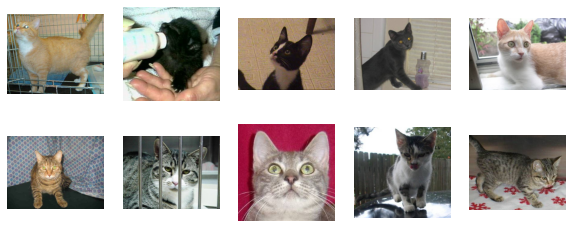

In [2]:
import matplotlib.pyplot as plt
import random as rnd

ten_rand_image = []
for i in range(10):
    r = rnd.randint(1,500)
    ten_rand_image.append(plt.imread(f"./originaldata/train/train/cat.{r}.jpg"))


fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(ten_rand_image[i], cmap = "gray")
    ax.axis("off")


## 0d) Train / Val / Test / Split

In [3]:
import shutil

r = rnd.sample(range(12499), 1250) # This random-list is created without duplicates, so no duplicates of pictures.
train_path = r"./experiment_small_data/train"
test_path = r"./experiment_small_data/test"
val_path = r"./experiment_small_data/val"
for i in range(1250):
        train_cat = f"./originaldata/train/train/cat.{r[i]}.jpg"
        train_dog = f"./originaldata/train/train/dog.{r[i]}.jpg"
        if i <= 800:
                end_path = train_path
        elif i <= 1000:
                end_path = val_path
        else:
                end_path = test_path
        shutil.copy(train_cat, end_path)
        shutil.copy(train_dog, end_path)

## 0e) One-hot-encoding

In [4]:
import numpy as np
temporary_train = np.array(os.listdir("./experiment_small_data/train"))
temporary_test = np.array(os.listdir("./experiment_small_data/test"))
temporary_val = np.array(os.listdir("./experiment_small_data/val"))
X_train = []
y_train = []
X_train_val = []
y_train_val = []


rnd.shuffle(temporary_train)
rnd.shuffle(temporary_val)
for i,_ in enumerate(temporary_val):
    if temporary_val[i][0:3] == "dog":
        animal = 1
    elif temporary_val[i][0:3] == "cat":
        animal = 0
    X_train_val.append(plt.imread(f"./experiment_small_data/train/{temporary_train[i]}"))
    y_train_val.append(animal)

for i,_ in enumerate(temporary_train):
    if temporary_train[i][0:3] == "dog":
        animal = 1
    elif temporary_train[i][0:3] == "cat":
        animal = 0
    X_train.append(plt.imread(f"./experiment_small_data/train/{temporary_train[i]}"))
    y_train.append(animal)


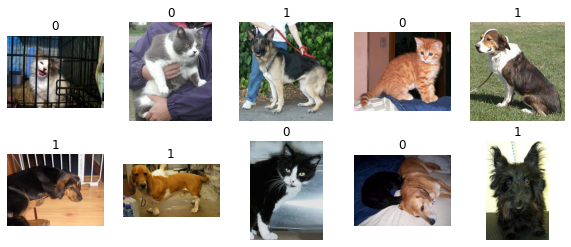

In [5]:
# plotting
fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], cmap = "gray")
    ax.axis("off")
    ax.set(title=y_train[i])


([<matplotlib.patches.Wedge at 0x1be37528430>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')])

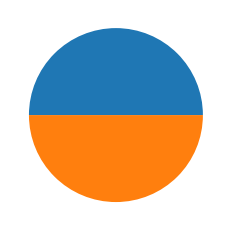

In [6]:
plt.pie([y_train.count(0),y_train.count(1)])

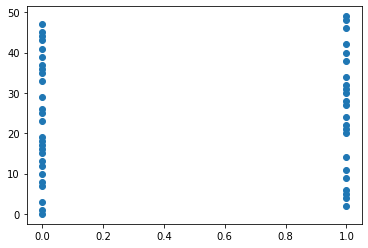

In [7]:
# plotting that they are not in a specific order, just random.
plot_list = []
x=0
for i in range(50):
    plot_list.append(x)
    x+=1
plt.scatter(x = y_train[0:50], y = plot_list)

## 1a) Plot image sizes.

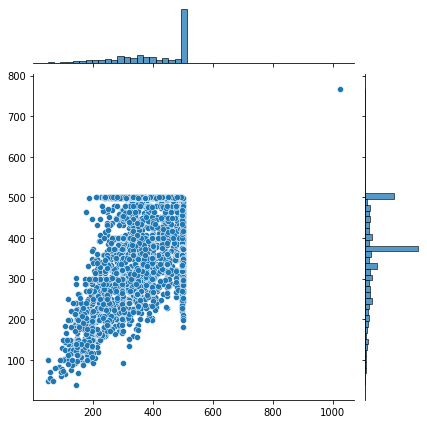

In [8]:
import seaborn as sns
import PIL

directory = './experiment_small_data/train/'
joint_x = []
joint_y = []

# code taken from https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
# but rewritten
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        image = PIL.Image.open(f)
        width, height = image.size
        joint_x.append(width)
        joint_y.append(height)

sns.jointplot(x = joint_x, y = joint_y)

## 1b) Resized pictures

- I used 224,224 since this was one of the most commonly used sizes. Not to small to remove a lot of pixels but not too big to be too heavy for the model.

In [9]:
#resize = (224,224)
resize = (100,100)
# resizing the pictures into  a new list.
import cv2
resized_X_train = []
resized_X_val = []
for i in range(len(X_train)):
    resized_X_train.append(cv2.resize(X_train[i], resize))
for i in range(len(X_train_val)):
    resized_X_val.append(cv2.resize(X_train_val[i], resize))

## 1c) Save the resized images into a new np array.

In [10]:
structured_resized_X_train = np.array(resized_X_train)
structured_resized_X_val = np.array(resized_X_val)

## 1d) Data augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

structured_resized_X_train = structured_resized_X_train.astype("float32")/255
structured_resized_X_val = structured_resized_X_val.astype("float32")/255
y_train = np.array(y_train)


train_image_generator = ImageDataGenerator(
    rotation_range = 15, 
    shear_range = .3,
    zoom_range = .2,
    horizontal_flip = False,
    height_shift_range = .2,
    width_shift_range = .2,
)

#don't augment validation and test data
test_image_generator = ImageDataGenerator()

train_X_generatior = test_image_generator.flow(structured_resized_X_train, y_train)
train_val_generator = test_image_generator.flow(structured_resized_X_val, y_train_val)
train_generator = train_image_generator.flow(
    structured_resized_X_train, y_train, batch_size = 800)


2
(32, 100, 100, 3)


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

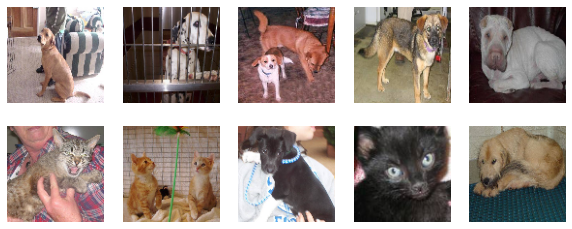

In [12]:
print(len(train_val_generator.next()))

sample_batch = train_val_generator.next()
print(sample_batch[0].shape) # 32 samples in a batch

def plot_samples(data):
    fig, axes = plt.subplots(2,5, figsize = (10,4))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap = "gray")
        ax.axis("off")
        
plot_samples(sample_batch[0])
sample_batch[1]

In [13]:
#test12 = structured_resized_X_train
#structured_resized_X_train.append(sample_batch[0])
print(sample_batch[0].shape)
print(structured_resized_X_train.shape)
print(structured_resized_X_val.shape)



(32, 100, 100, 3)
(4542, 100, 100, 3)
(1188, 100, 100, 3)


## 2a) Train models with hyperparameter tuning.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam

def CNN_model(learning_rate = .001, drop_rate = .7, kernels = [32,64,128,128]):
    adam = Adam(learning_rate = learning_rate)

    model = Sequential(name = "CNN_model")

    for number_kernel in kernels:
        conv_layer = Conv2D(number_kernel, kernel_size = (3,3), 
            activation = "relu", kernel_initializer = "he_normal", 
            input_shape = structured_resized_X_train.shape[1:])
        
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

    #MLP layers
    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ["acc"])

    return model

model = CNN_model()
model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 10, 10, 128)      0 

In [33]:
steps_per_epochs = len(structured_resized_X_train)/32
validation_steps = len(X_train_val)/32


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor = "val_loss", mode ="max", patience = 10, restore_best_weights = True)

model.fit(
    train_X_generatior,
    epochs = 100,
    callbacks = [early_stopper],
    validation_data = train_val_generator,
    validation_steps=24
)

Epoch 1/100
142/142 [==============================] - 32s 223ms/step - loss: 0.7193 - acc: 0.5302 - val_loss: 0.7032 - val_acc: 0.5156
Epoch 2/100
142/142 [==============================] - 30s 213ms/step - loss: 0.6659 - acc: 0.5971 - val_loss: 0.7429 - val_acc: 0.5000
Epoch 3/100
142/142 [==============================] - 30s 214ms/step - loss: 0.6330 - acc: 0.6508 - val_loss: 0.8581 - val_acc: 0.4792
Epoch 4/100
142/142 [==============================] - 30s 209ms/step - loss: 0.6044 - acc: 0.6689 - val_loss: 0.7622 - val_acc: 0.5195
Epoch 5/100
142/142 [==============================] - 30s 209ms/step - loss: 0.5829 - acc: 0.6913 - val_loss: 0.8538 - val_acc: 0.4831
Epoch 6/100
 18/142 [==>...........................] - ETA: 25s - loss: 0.5712 - acc: 0.7205

KeyboardInterrupt: 

In [17]:
import pandas as panda
metrics = panda.DataFrame(model.history.history)
metrics.head()

,loss,acc,val_loss,val_acc
0,0.770539,0.521136,0.746031,0.507812
1,0.650082,0.616909,0.881443,0.497396
2,0.603739,0.675473,0.949507,0.493490
3,0.572274,0.700793,0.912205,0.481771
4,0.529907,0.726992,0.988437,0.505208


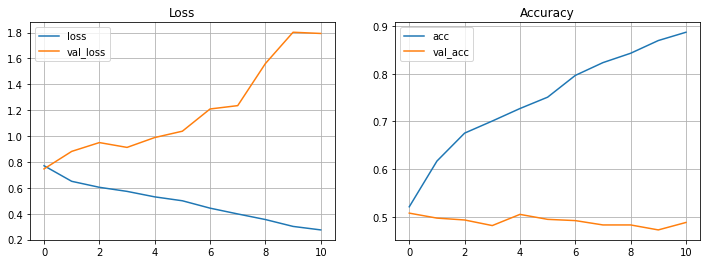

In [18]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)